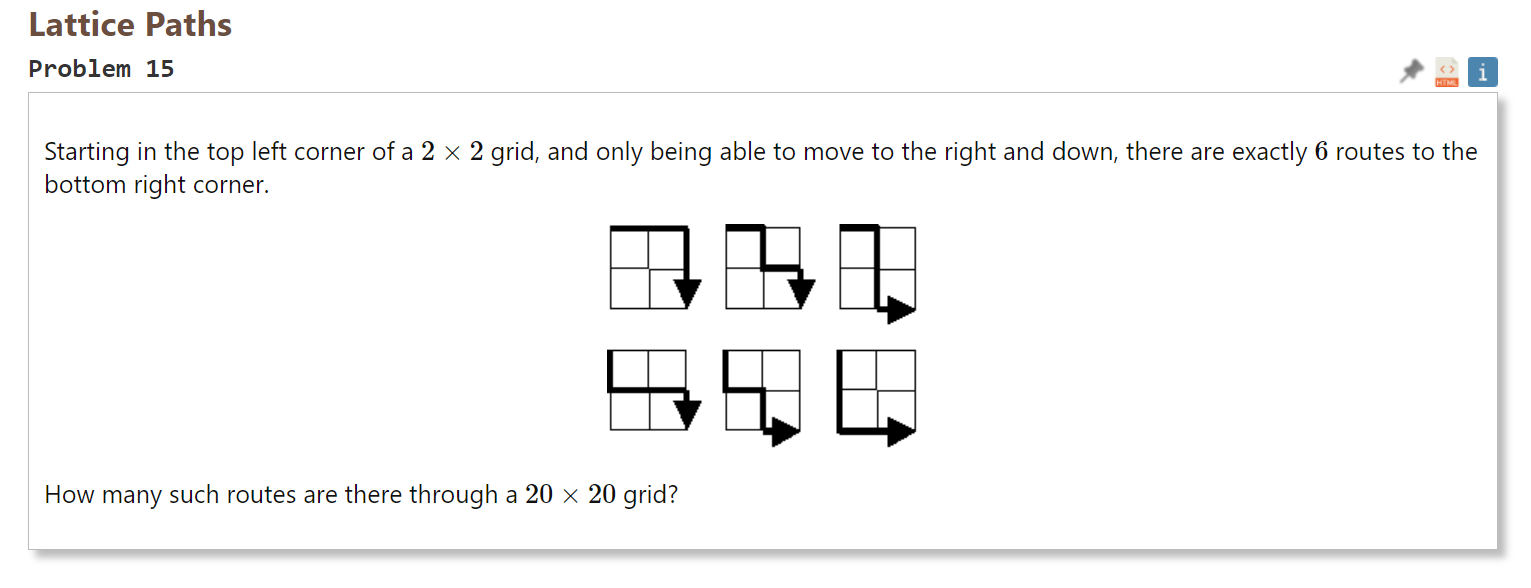

There will be width + height moves in total, width right moves and height down moves.  
Right moves are indistinguishable from each other and so are down moves.  
This is the equivalent of doing #moves total choose #right moves = #moves total choose #down moves.  
So we are doing a choose function, how do we derive this?  
If we treat every move as distinct, then there are moves! number of routes, but we need to realise a lot of these routes are identical  
Therefore we have to divide by the number of ways right moves and down moved were chosen that were actually the same.  
Because if we look at say rrrrr, there are 5 different right moves there, so 5! different ways to order them, but these are all actually the same route.  
The same goes for down moves, we have to divide by the different ways to order them.  
So we get that
$$number \ of \ routes = \frac{(width+height)!}{width!*height!}$$
We can make this a bit easier to calculate, if for instance $height \geq width$ we can think of it as
$$\frac{(width+height) * (width+height-1)*...*(height+1)*height!}{width!*height!} = \frac{(width+height) * (width+height-1)*...*(height+1)}{width!}$$
The same is true if width is bigger - we choose the bigger one as this eliminates the most terms on the top and the bottom

In [1]:
def calculate_routes(width, height):
    big = max(width, height)
    small = min(width, height)
    numerator = 1
    for num in range(big + 1, big+small + 1):
        numerator *= num
    denominator = 1
    for num in range(1, small + 1):
        denominator *= num
    return int(numerator/denominator)

In [5]:
%%timeit
calculate_routes(200, 200)

37.6 µs ± 701 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [32]:
%%timeit
calculate_routes(20, 20)

3.23 µs ± 66.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Without Cancelling Terms

In [28]:
def factorial(n):
    total = 1
    for num in range(1, n+1):
        total *= num
    return total


def calculate_routes_bad(width, height):
    return int(factorial(width+height)/(factorial(width)*factorial(height)))

In [31]:
calculate_routes_bad(20, 20)

137846528820

In [33]:
%%timeit
calculate_routes_bad(20, 20)

5.41 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
